# Spatial Tuning Maps

In [1]:
import pickle
import os
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from pathlib import Path
import numpy as np
from tqdm import tqdm

from dataloader import SpikesCoordDataset
from util import *

ROOT = Path("/work")
DATA_DIR = ROOT/Path('data/alldata/')
datalist = np.array([x for x in DATA_DIR.iterdir()])


## Representatives

In [2]:
def cal_sta(dataset: SpikesCoordDataset, num_par: int, neuron_id: int) -> NDArray:
    """Calculate spike triggered average.
    """
    speed = cal_velocity(dataset.coords_xy)
    binned_position = bin_pos(dataset.coords_xy[speed > 1.0], num_par) # use the data whose speed is larger than 1cm/s
    filtered_spikes = dataset.spikes[speed > 1.0, neuron_id] 

    sta = np.zeros(num_par*num_par)
    for position in sorted(np.unique(binned_position)):
        index = (binned_position == position)
        spikes_sum = np.sum(filtered_spikes[index])
        total_time = np.sum(index)
        sta[int(position)-1] = spikes_sum/total_time
    sta = np.array(sta).reshape(num_par,-1)
    
    return sta

### knockout

Text(0.5, 0.98, 'knockout')

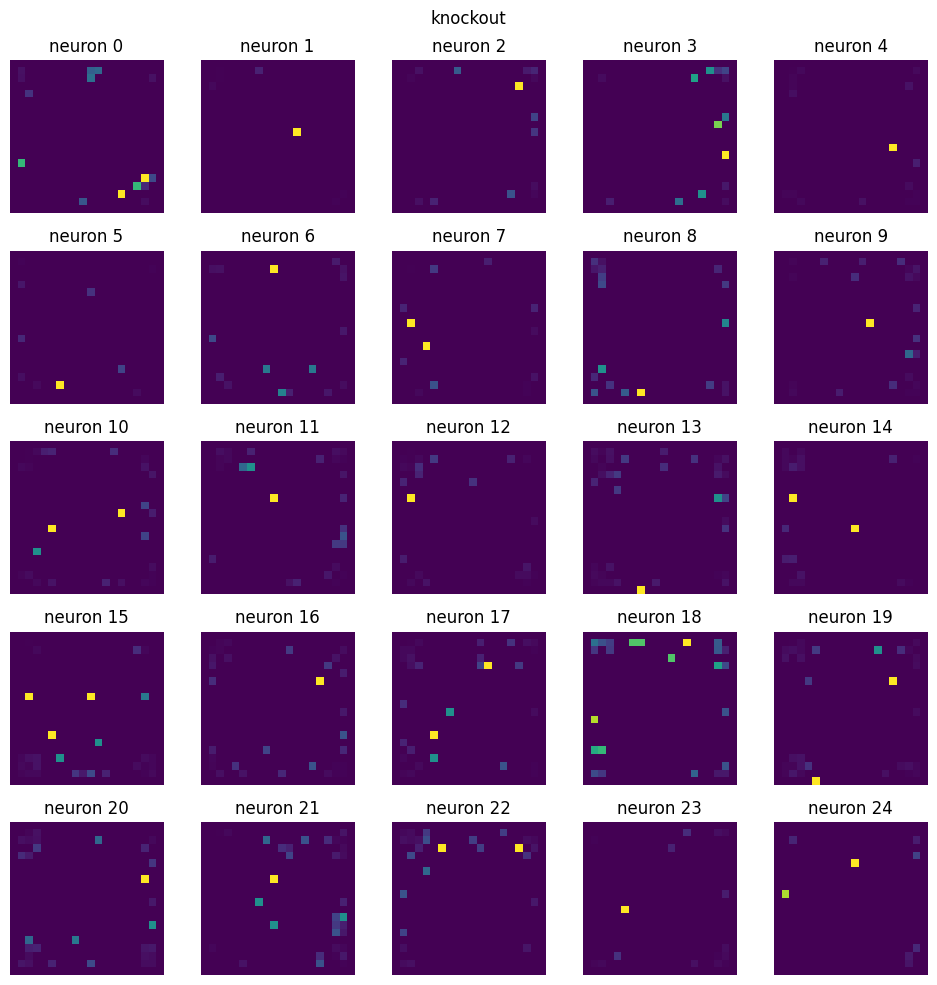

In [3]:
data_dir = datalist[0]
data_name = str(data_dir).split('/')[-1]
mouse_type = "knockout" if "CaMKII" in data_name else "wild-type"

dataset = SpikesCoordDataset(data_dir)
num_neuron = dataset.spikes.shape[1]

# show 50 neurons
fig, axes = plt.subplots(nrows=5, ncols=5 ,tight_layout=True, figsize=(10,10))
axes = axes.ravel()
for neuron_id in range(len(axes)):
    sta = cal_sta(dataset, num_par=20, neuron_id=neuron_id)
    axes[neuron_id].imshow(sta)
    axes[neuron_id].set_title(f"neuron {neuron_id}")
    axes[neuron_id].axis("off")
fig.suptitle(mouse_type)

### wild-type

Text(0.5, 0.98, 'wild-type')

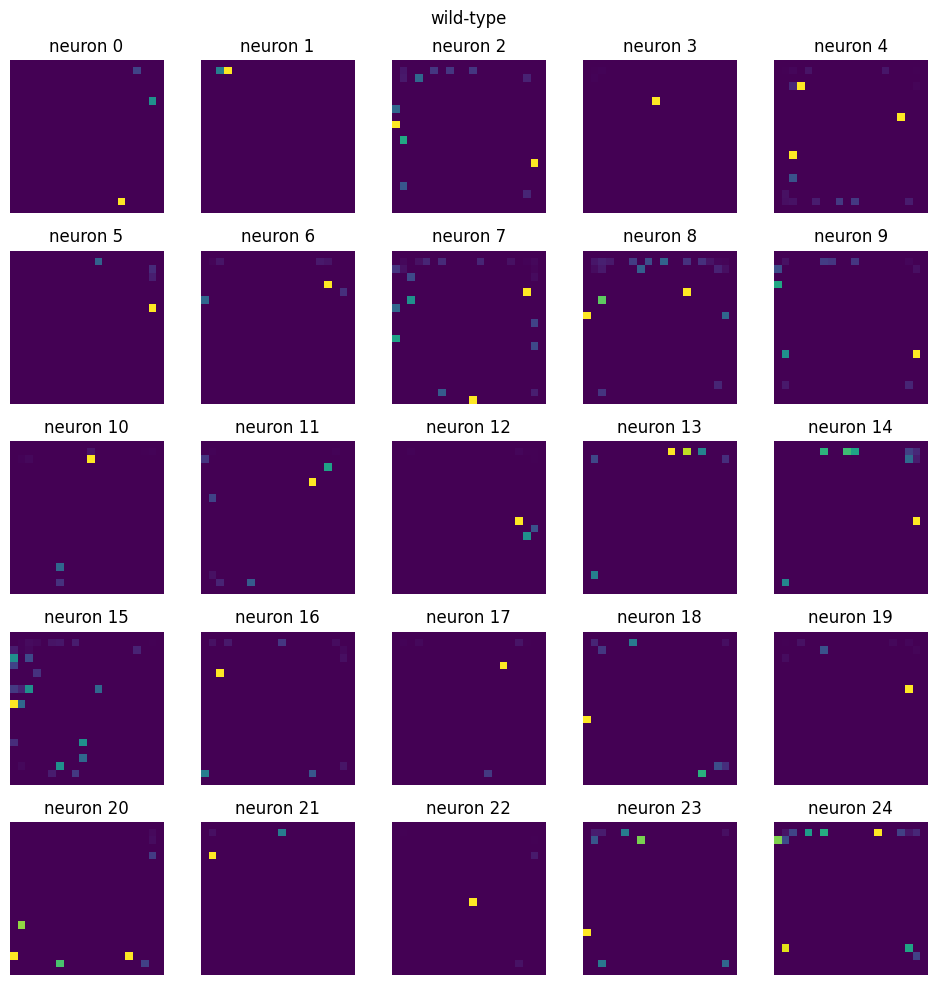

In [4]:
data_dir = datalist[2]
data_name = str(data_dir).split('/')[-1]
mouse_type = "knockout" if "CaMKII" in data_name else "wild-type"

dataset = SpikesCoordDataset(data_dir)
num_neuron = dataset.spikes.shape[1]

# show 50 neurons
fig, axes = plt.subplots(nrows=5, ncols=5 ,tight_layout=True, figsize=(10,10))
axes = axes.ravel()
for neuron_id in range(len(axes)):
    sta = cal_sta(dataset, num_par=20, neuron_id=neuron_id)
    axes[neuron_id].imshow(sta)
    axes[neuron_id].set_title(f"neuron {neuron_id}")
    axes[neuron_id].axis("off")
fig.suptitle(mouse_type)

## All mice
save fig to `data/interim/data-exploration`

In [5]:
OUTPUT_DIR = ROOT/Path("data/interim/data-exploration/")
ko_count, wt_count = 0, 0
for data_dir in tqdm(datalist):
    data_name = str(data_dir).split('/')[-1]

    # show 30 neurons
    fig, axes = plt.subplots(nrows=5, ncols=6 ,tight_layout=True, figsize=(12,12))

    if "CaMKII" in data_name:
        mouse_type = "knockout"
        ko_count+=1
        fig.suptitle(f"{mouse_type} {ko_count}")

    else:
        mouse_type = "wild-type"
        wt_count+=1
        fig.suptitle(f"{mouse_type} {wt_count}")

    dataset = SpikesCoordDataset(data_dir)
    num_neuron = dataset.spikes.shape[1]

    axes = axes.ravel()
    for neuron_id in range(len(axes)):
        if neuron_id+1 > num_neuron: break
        sta = cal_sta(dataset, num_par=20, neuron_id=neuron_id)
        axes[neuron_id].imshow(sta)
        axes[neuron_id].set_title(f"n {neuron_id+1}")
        axes[neuron_id].axis("off")

    if not (OUTPUT_DIR/data_name).exists():
        (OUTPUT_DIR/data_name).mkdir()
    fig.savefig(OUTPUT_DIR/data_name/"sta.png")
    fig.clf()

100%|██████████| 12/12 [02:46<00:00, 13.84s/it]


<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>